## Amazon Product Recommendation

Online E-commerce websites like Amazon, Filpkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real time. This type of filtering matches each of the user's purchased and rated items to similar items, then combines those similar items into a recommendation list for the user. In this project we are going to build recommendation model for the electronics products of Amazon.

#### Attribute Information:

● overall: Rating of the corresponding product by the corresponding user

● verified: Every user is either reviewed or not

● reviewTime: Time when review is provide

● reviewerID: Every user identified with a unique id

● asin: Every product identified with a unique id(Second Column)

● reviewerName: Name of the user

● timestamp: Time of the rating ( Fourth Column)

#### Problem Statement:

Our objective is to build a recommendation system to recommend products to customers based on the their previous ratings for other products. For this purpose, first we will perform exploratory data analysis and then implement recommendation algorithms including Popularity-Based, Collaborative filtering.

Both these recommendation systems can be defined as below:

● Popularity based systems: It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation and is mostly useful for the test case of recommending products to new customers.

● Collaborative Filtering: It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. There are two ways of doing this. One is user based and second is item based collaborative filtering.

### Reading the data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [2]:
# Loading the product data into data frames

allbeauty_df = pd.read_json("data\All_Beauty.json", lines = True)
fashion_df = pd.read_json("data\AMAZON_FASHION.json", lines = True)
appliances_df = pd.read_json("data\Appliances.json", lines = True)

In [3]:
# Checking the shape of the data

print(allbeauty_df.shape, fashion_df.shape, appliances_df.shape)

(371345, 12) (883636, 12) (602777, 12)


In [4]:
# Checking the allbeauty data

allbeauty_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN
3,5,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN
4,5,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN


In [5]:
# Checking the fashion data

fashion_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN


In [6]:
# Checking the appliances data

appliances_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN
2,5,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN
3,5,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN
4,5,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN


### Data Preprocessing

In [7]:
# Retrieving the columns neccessary for the analysis

allbeauty_df2 = allbeauty_df[['overall','verified','reviewerID','reviewTime','asin']]
fashion_df2 = fashion_df[['overall','verified','reviewerID','reviewTime','asin']]
appliances_df2 = appliances_df[['overall','verified','reviewerID','reviewTime','asin']]

In [8]:
# Combining all the dataframes into a single dataframe

df = allbeauty_df2.append(fashion_df2).append(appliances_df2)

In [9]:
# Checking the shape of the final dataframe

df.shape

(1857758, 5)

In [10]:
# Checking the data in final dataframe

df.head()

,overall,verified,reviewerID,reviewTime,asin
0,1,True,A1V6B6TNIC10QE,"02 19, 2015",0143026860
1,4,True,A2F5GHSXFQ0W6J,"12 18, 2014",0143026860
2,4,True,A1572GUYS7DGSR,"08 10, 2014",0143026860
3,5,True,A1PSGLFK1NSVO,"03 11, 2013",0143026860
4,5,True,A6IKXKZMTKGSC,"12 25, 2011",0143026860


In [11]:
# Renaming the dataframe columns as required

df = df.rename(columns={'overall':'rating','asin':'itemID'})

In [12]:
# Checking the dataframe

df.head()

,rating,verified,reviewerID,reviewTime,itemID
0,1,True,A1V6B6TNIC10QE,"02 19, 2015",0143026860
1,4,True,A2F5GHSXFQ0W6J,"12 18, 2014",0143026860
2,4,True,A1572GUYS7DGSR,"08 10, 2014",0143026860
3,5,True,A1PSGLFK1NSVO,"03 11, 2013",0143026860
4,5,True,A6IKXKZMTKGSC,"12 25, 2011",0143026860


In [13]:
# Checking the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1857758 entries, 0 to 602776
Data columns (total 5 columns):
rating        int64
verified      bool
reviewerID    object
reviewTime    object
itemID        object
dtypes: bool(1), int64(1), object(3)
memory usage: 72.6+ MB


In [14]:
# Checking max and min values of ratings

print(df.rating.max(),df.rating.min())

5 1


In [15]:
# Checking if rating has any invalid entries

df.rating.unique()

array([1, 4, 5, 2, 3], dtype=int64)

In [16]:
# Converting boolean data of verified column to integer data of 0 and 1

df['verified'] = df['verified'].astype(int)

In [17]:
# Validing the column change

df.head()

,rating,verified,reviewerID,reviewTime,itemID
0,1,1,A1V6B6TNIC10QE,"02 19, 2015",0143026860
1,4,1,A2F5GHSXFQ0W6J,"12 18, 2014",0143026860
2,4,1,A1572GUYS7DGSR,"08 10, 2014",0143026860
3,5,1,A1PSGLFK1NSVO,"03 11, 2013",0143026860
4,5,1,A6IKXKZMTKGSC,"12 25, 2011",0143026860


In [18]:
# Checking for NaN values in the dataframe

df.isnull().sum()

rating        0
verified      0
reviewerID    0
reviewTime    0
itemID        0
dtype: int64

In [19]:
# Checking for invalid entried in verfied column

df.verified.value_counts()

1    1715042
0     142716
Name: verified, dtype: int64

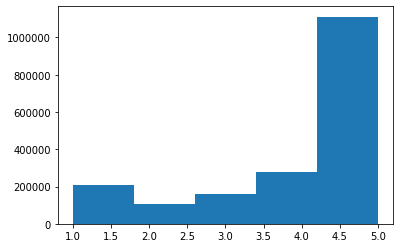

In [20]:
# Visualizing ratings

plt.hist(df.rating, 5, alpha=1);

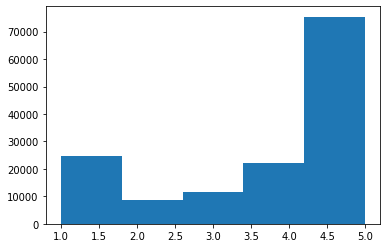

In [21]:
# Visualizing ratings

plt.hist(df[df.verified==0].rating, 5, alpha=1);

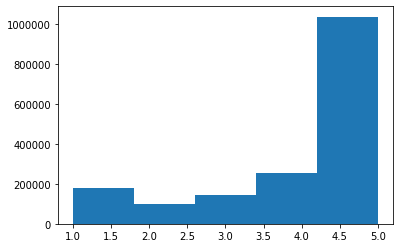

In [22]:
# Visualizing ratings

plt.hist(df[df.verified==1].rating, 5, alpha=1);

Looking at the histogram we can see that non verified users show a bigger 1 rating which could be impacting the overall low ratings for the products. This is a business call to handle this data to be removed or kept.

In [23]:
# Checking for duplicate values 

df[df.duplicated(subset=['rating','reviewerID','reviewTime','itemID'], keep='first')].head()

,rating,verified,reviewerID,reviewTime,itemID
6905,4,1,ACTVXNBEPLW2S,"01 25, 2015",B000052YAN
7166,5,1,A3AMP8ZS2WQ94N,"11 19, 2014",B0000530HU
9557,5,0,A1CJPRUT6GHTGO,"01 30, 2007",B000067E30
11543,2,0,A6HO1UBMBOZTY,"09 13, 2006",B00009RB0Z
12224,3,1,A2LHFW4Q0UWIFA,"10 26, 2016",B00011QUDE


In [24]:
# Validating duplicate results

df[df.reviewerID=='ACTVXNBEPLW2S']

,rating,verified,reviewerID,reviewTime,itemID
6904,4,1,ACTVXNBEPLW2S,"01 25, 2015",B000052YAN
6905,4,1,ACTVXNBEPLW2S,"01 25, 2015",B000052YAN
32550,5,1,ACTVXNBEPLW2S,"05 9, 2014",B000GGFZLC


There are several duplicate recording in the dataframe. These duplicate records will be removed, however while doing so we make sure that one entry is retained and all other duplicates will be removed.

In [25]:
# Sorting the values based on reviewTime

df.sort_values("reviewTime", ascending= [0], inplace=True)

In [26]:
# Validating the sort

df.head()

,rating,verified,reviewerID,reviewTime,itemID
492858,5,1,A2NU79MV53K6QC,"12 9, 2017",B003DA62RO
15838,2,1,A26X82NBM5DNRR,"12 9, 2017",B000209JS2
324282,1,1,A26JQ8CGJ73F55,"12 9, 2017",B00V0VTDVA
315548,4,1,A3G4I85N5HZ7S4,"12 9, 2017",B0157IZIRY
573583,5,1,A18WJ8GQLOB9P9,"12 9, 2017",B00ULM1D6W


In [27]:
# Checking the length of dataframe before removing duplicates

len(df)

1857758

In [28]:
# Removing the duplicates while keeping the first value of the duplicates

df.drop_duplicates(keep='first',inplace=True) 

In [29]:
# Checking the length of dataframe after removing duplicates

len(df)

1829243

In [30]:
# Validating to see if duplicates are removed

df[df.reviewerID=='ACTVXNBEPLW2S']

,rating,verified,reviewerID,reviewTime,itemID
32550,5,1,ACTVXNBEPLW2S,"05 9, 2014",B000GGFZLC
6904,4,1,ACTVXNBEPLW2S,"01 25, 2015",B000052YAN


### For New Customers

#### Popularity based model

Since a new customer will not have any historical data the right approach to recommend the products is by making use of the popularity based model. This model will have all the items which got the highest rating and at the top.

In [31]:
# Creating a new dataframe and creating the count per item and mean rating per item

df2 = pd.DataFrame({'count':df.groupby('itemID')['rating'].count(),'ratingMean':df.groupby('itemID')['rating'].mean()}).reset_index()

In [32]:
# Printing the maximum count and minimum count values

print(df2['count'].max(), df2['count'].min())

8668 1


In [33]:
# Printing the record count and the items who got less than 500 ratings

print(len(df2), len(df2[df2['count']<500]))

249027 248717


In [34]:
# Getting the items which has ratings greater than 500 and mean rating greater than 4. Again this could be a business call

df2 = df2[(df2['count']>500) & (df2['ratingMean']>=4.0)]

In [35]:
# Printing the maximum and minimum ratigs count

print(df2['count'].max(), df2['count'].min())

8668 505


In [36]:
# Sorting dataframe by rating mean in descending order

df2 = pd.DataFrame(df2.sort_values(by = ['ratingMean'], ascending= False))

In [37]:
# Printing the top 15 records of the popular products

df2.head(15)

,itemID,count,ratingMean
1906,B0009RF9DW,772,4.933938
2913,B000FI4S1E,773,4.931436
46577,B00DM8J11Q,1416,4.868644
7478,B0012Y0ZG2,1101,4.852861
26947,B006H7HB7K,526,4.851711
200880,B01B5BWTNS,528,4.844697
21677,B0053F80JA,1366,4.838946
6230,B000URXP6E,1003,4.838485
111843,B00RLSCLJM,3529,4.826296
243,B00006L9LC,712,4.814607


### Collaborative Filtering

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.

It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions. Here we use the SVD approach to provide product recommendations based on item.

#### SVD - Singular Value Decomposition

One of the popular algorithms to factorize a matrix is the singular value decomposition(SVD) algorithm. First I build a user-item matrix. Then we decompose this matrix using SVD to extract constituent arrays of feature vectors and correlation out of it.

In [38]:
# Filtering out the values with user ratings which are less than 50

df3 = df.groupby('itemID').filter(lambda x:x['rating'].count()>50)

In [39]:
# Getting a subset of the data

df4 = df3.head(10000)

In [40]:
# Checking the record counts

print(len(df3), len(df4))

941800 10000


In [41]:
# Creating the utility matrix with reviewerID and itemID

utility_matrix =df4.pivot_table(values='rating', index='reviewerID', columns='itemID', fill_value=0)

In [42]:
# Checking the utility matrix

utility_matrix.head()

itemID,1620213982,B00004YWK2,B000050B6H,B000050FDY,B000052YAN,B0000530HU,B00005JS5C,B00005OU6T,B000068PBJ,B00006IV17,...,B01H8A05N6,B01HBLM8EQ,B01HBPGP28,B01HBSH2EK,B01HC6G4D6,B01HC7ZP1M,B01HC9ONI6,B01HDZ4OOM,B01HEISONU,B01HI7K476
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0090831Q386KET36YQW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0122375SQ8Z42DUL03J,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0207585A6YBSJJPD5FS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0634459IUT5LVFM9YZZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1000I7I07B7OI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Checking the shape of the utility matrix

utility_matrix.shape

(9344, 3335)

In [44]:
# Creating the transpose of the matrix

utility_matrix = utility_matrix.T
utility_matrix.head()

reviewerID,A0090831Q386KET36YQW,A0122375SQ8Z42DUL03J,A0207585A6YBSJJPD5FS,A0634459IUT5LVFM9YZZ,A1000I7I07B7OI,A1003HDK1GHMSP,A101GQRGM79ZAX,A101LWC4TVG0VT,A101NXBK4DJ454,A102G6SC7VE2HS,...,AZW33SSW09BZ6,AZW7OWXHAHGKT,AZX1PZRBP1FJD,AZX3R9XUGMQWD,AZXFF73ZZM0FV,AZYA6NBTF2843,AZYEIBAO4SWEO,AZYNASCEZ6FXX,AZYQE4YLJCLBI,AZZSKNX254F5D
itemID,,,,,,,,,,,,,,,,,,,,,
1620213982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004YWK2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000050B6H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000050FDY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000052YAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Checking the shape of the transposed matrix

utility_matrix.shape

(3335, 9344)

In [46]:
# Creating the SVD model and fiting the utility matrix

SVD = TruncatedSVD(n_components=10)
decomposed_utility = SVD.fit_transform(utility_matrix)
decomposed_utility.shape

(3335, 10)

In [47]:
# Creating the correlation matrix using the decomposed utility matrix

correlation_matrix = np.corrcoef(decomposed_utility)
correlation_matrix.shape

(3335, 3335)

In [48]:
# Creating a method for recommendation system

def recommendation_system(i):
    item_names = list(utility_matrix.index)
    item_ID = item_names.index(i)
    result = list(utility_matrix.index[correlation_matrix[item_ID] > 0.70])
    result.remove(i)
    return result[0:15]

In [49]:
# Recommending the top 15 correlated items based on the item search

recommendation_system('B00005JS5C')

['B00006IV17',
 'B0000DK356',
 'B0001AD4TS',
 'B0001HYLR0',
 'B0001WXTPA',
 'B0001YM48Q',
 'B00028LYO6',
 'B0002JGIZA',
 'B0002JHI1I',
 'B0002MQ9GK',
 'B0002PU864',
 'B0002TSA8I',
 'B000674526',
 'B0006M559S',
 'B00076VESY']